In [1]:
import os
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
SEEDS = [27, 28, 29]
MODELS = ['dbert', 'dbidaf', 'droberta', 'squad']

## Load data

### Load per example metrics

In [4]:
example_metric_df = pd.DataFrame()

for seed in SEEDS:
    for model in MODELS:
        df = pd.read_csv(f'data/processed/per_example_metrics-squadv1-adversarialall-dataset={model}-seed={seed}.csv')
        print(df.shape)
        example_metric_df = example_metric_df.append(df)
        
print(example_metric_df.shape)
example_metric_df.head()

(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(4885200, 6)


,id,checkpoint,seed,exact_match,f1,dataset
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert


### Duplicate and add seed and km_seed columns

In [5]:
example_metric_df_expanded = pd.DataFrame()

for k_seed in SEEDS:
    for n_clusters in [4, 7, 10]:
        df = example_metric_df.copy()
        df['km_seed'] = k_seed
        df['n_clusters'] = n_clusters
        example_metric_df_expanded = example_metric_df_expanded.append(df)

In [6]:
example_metric_df_expanded.shape

(43966800, 8)

### Load cluster labels

In [7]:
cluster_data = pd.DataFrame()

for seed in SEEDS:
    for km_seed in SEEDS:
        for n_clusters in [4, 7, 10]:
            df = pd.read_csv(f'data/processed/squadv1-adversarialall-clusters-seed={seed}-km_seed={km_seed}-n_clusters={n_clusters}.csv')
            df['n_clusters'] = n_clusters
            cluster_data = cluster_data.append(df)

In [8]:
cluster_data.shape

(366390, 5)

### Merge data

In [9]:
example_metric_df_expanded.head()

,id,checkpoint,seed,exact_match,f1,dataset,km_seed,n_clusters
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert,27,4
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert,27,4
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert,27,4
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert,27,4
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert,27,4


In [10]:
cluster_data.head()

,id,KM_label,km_seed,model_seed,n_clusters
0,000bcf40cda48527886c945b612c0c54ed46dff8,2,27,27,4
1,001a30863d32440f80d5f4f65e7bb3ee0698f0a0,3,27,27,4
2,00245d3e103a58ff1e76c4996721a03a70412422,1,27,27,4
3,004241bb0375392cd909e85aeedbdf9b2f899def,1,27,27,4
4,0054d06bf3be61edaa33f71cf897f98a37e73ea8,3,27,27,4


In [11]:
combined = example_metric_df_expanded.merge(
    cluster_data, 
    left_on=['id', 'seed', 'km_seed', 'n_clusters'], 
    right_on=['id', 'model_seed', 'km_seed', 'n_clusters']
)
print(combined.shape)
combined.head()

(43966800, 10)


,id,checkpoint,seed,exact_match,f1,dataset,km_seed,n_clusters,KM_label,model_seed
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert,27,4,3,27
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert,27,4,3,27
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert,27,4,3,27
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert,27,4,3,27
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert,27,4,3,27


In [13]:
assert combined.shape[0] == (
    13570 *  # Number of examples
    120 *  # Number of checkpoints
    3 *  # Number of seeds
    3 * # Number of k-means seeds
    3  # Number of clusters tried
)

## Plot data

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


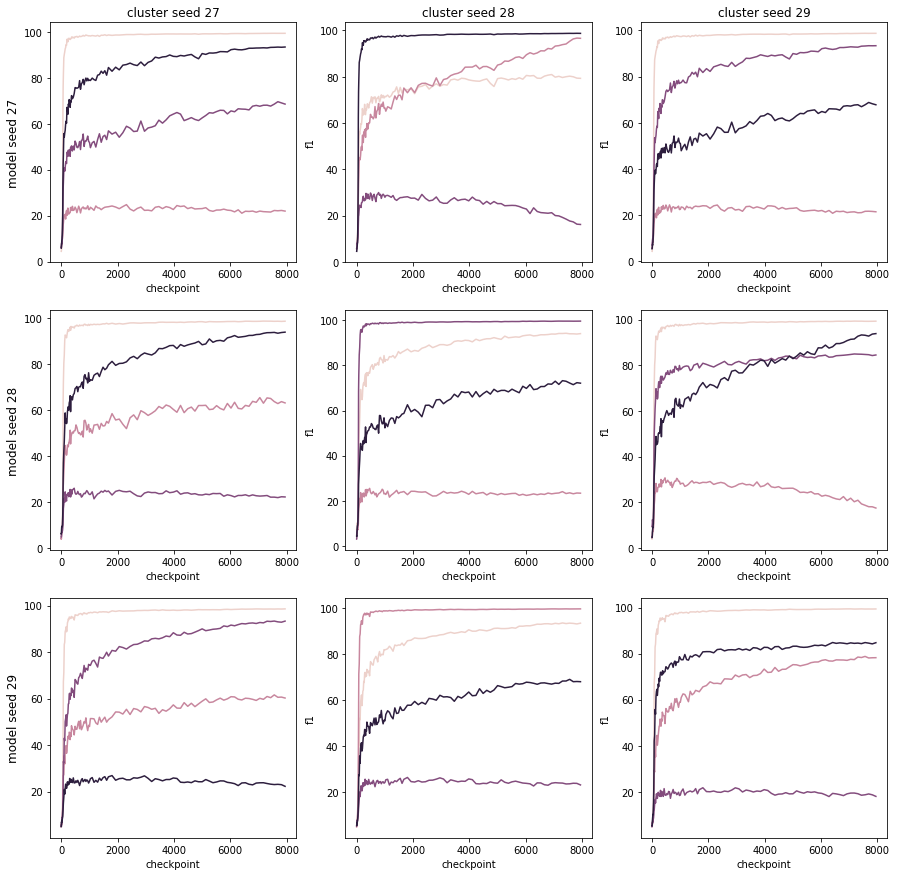

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


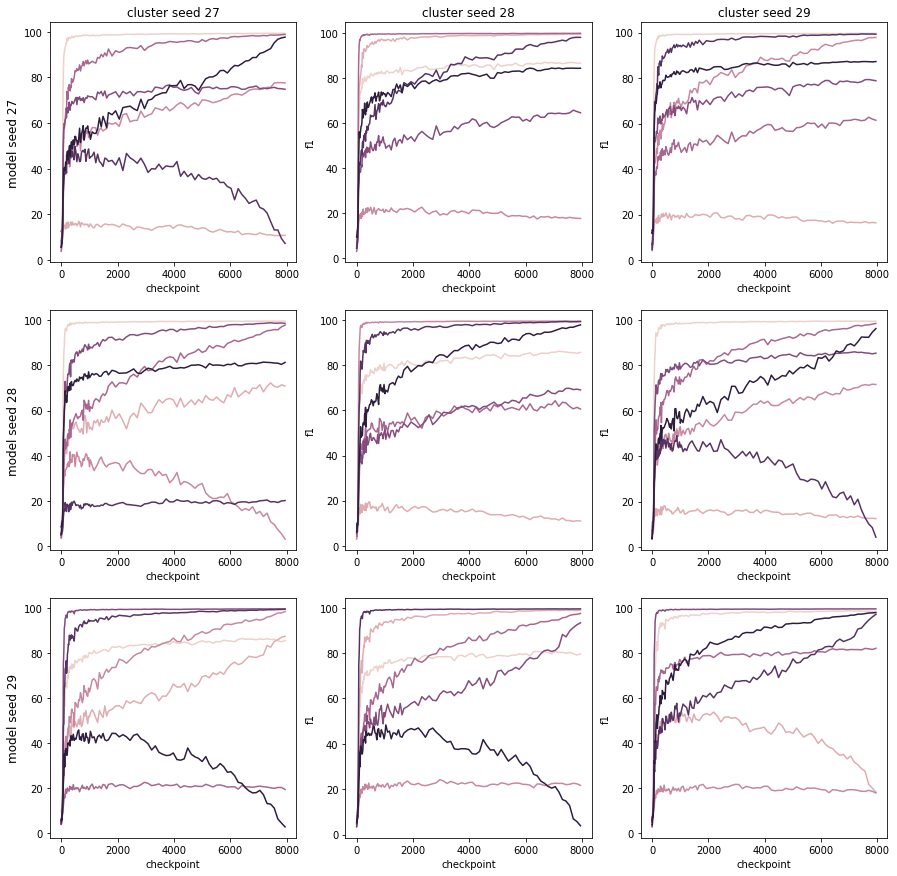

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


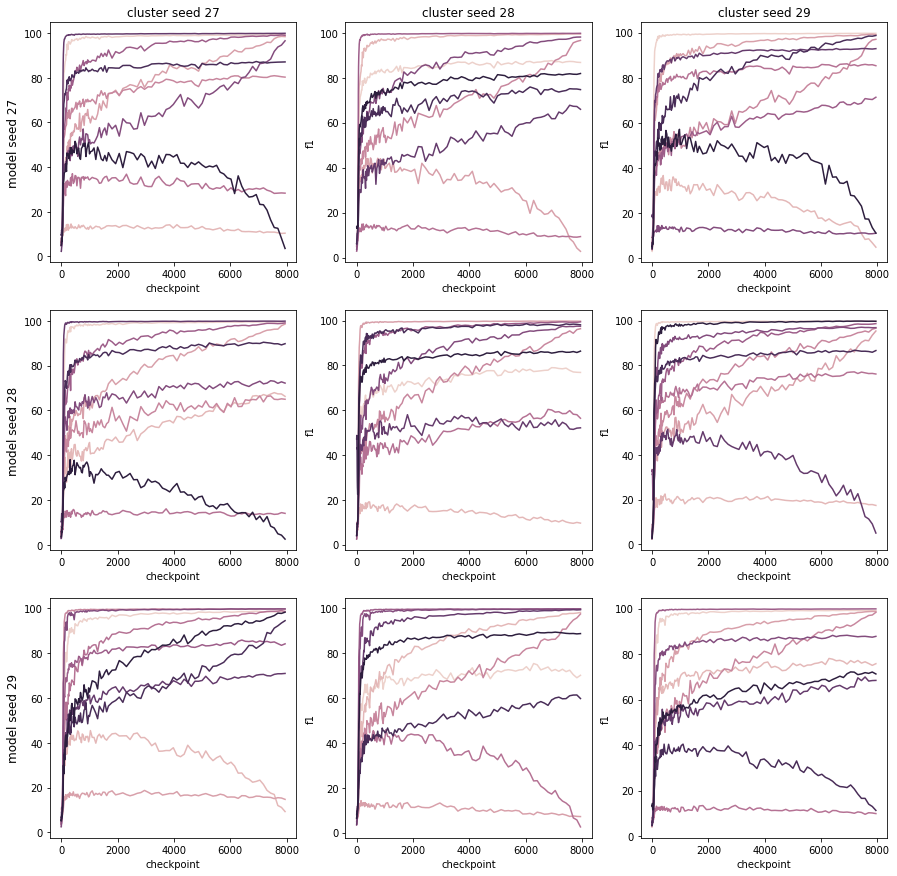

In [42]:
for n_clusters in [4, 7, 10]:

    plot_df = combined[combined['n_clusters'] == n_clusters]

    fig, axs = plt.subplots(len(SEEDS), len(SEEDS), figsize=(15, 15))

    idx_x, idx_y = 0, 0  
    i = 0
    for seed in SEEDS:
        for km_seed in SEEDS:

            print(seed, km_seed, idx_x, idx_y)
            
            plot_df_mean = plot_df[
                (plot_df['model_seed'] == seed) & 
                (plot_df['km_seed'] == km_seed)
            ].groupby(
                ['checkpoint', 'KM_label']  # Take average over examples belonging to a cluster for a given checkpoint
            ).mean().reset_index()
            
            assert plot_df_mean.shape[0] == 120 * n_clusters
            
            sns.lineplot(
                data=plot_df_mean, 
                x='checkpoint', 
                y='f1', 
                hue='KM_label',
                ax=axs[idx_x, idx_y]
            )

            axs[idx_x, idx_y].get_legend().remove()

            if (i % 3 == 0) | (i % 3 == 1):
                idx_y += 1
            else:
                idx_y -= 2
                idx_x += 1

            i += 1

    rows = [f'model seed {i}' for i in SEEDS]
    cols = [f'cluster seed {i}' for i in SEEDS]

    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, rotation=90, size='large')

    plt.show()

## Cluster analysis

### 4 clusters, model seed 27, cluster seed 27

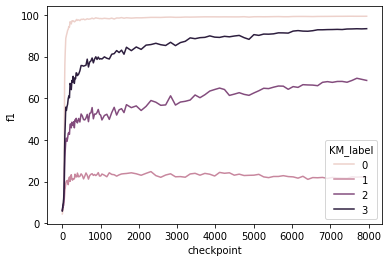

In [57]:
sns.lineplot(
    data=combined.copy()[
        (combined['n_clusters'] == 4) & 
        (combined['seed'] == 27) & 
        (combined['km_seed'] == 27)
    ].groupby(['checkpoint', 'KM_label']).mean().reset_index(), 
    x='checkpoint', 
    y='f1', 
    hue='KM_label'
)
plt.show()

In [47]:
subset = combined.copy()[
    (combined['n_clusters'] == 4) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 27)
][
    ['id', 'dataset', 'KM_label']
].drop_duplicates()  # Duplicated due to multiple checkpoints

print(subset.shape)
subset.head()

(13570, 3)


,id,dataset,KM_label
0,21a3561031f2e909338196601f5c1ac2e08905b6,dbert,3
120,b6a71a728a35506dd4cd2179c9342acf5e1a047a,dbert,2
240,6febf2fec8ae1b105a1b955897415fea4b2c0c28,dbert,3
360,53e4ce951aeab3a2712aa0966d73ec3e2c62ca11,dbert,1
480,a0a308febc5e9edf56fe63556cf20c039c3fdaca,dbert,1


In [63]:
subset[subset['KM_label'] == 3]['dataset'].value_counts() / subset[subset['KM_label'] == 3].shape[0]

squad       0.708480
dbidaf      0.115789
dbert       0.096491
droberta    0.079240
Name: dataset, dtype: float64

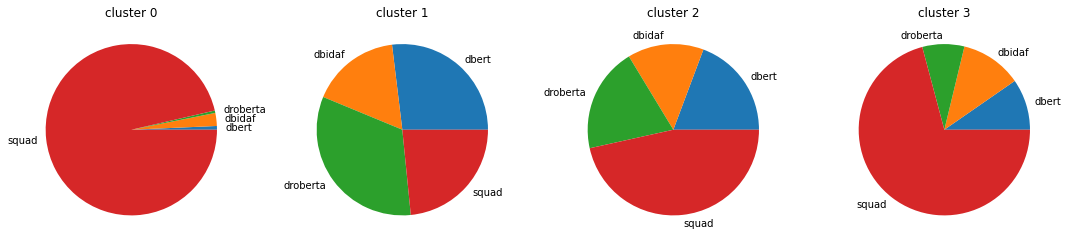

In [71]:
fig, axs = plt.subplots(1, subset['KM_label'].nunique(), figsize=(15, 4))

for i, label in enumerate(np.sort(subset['KM_label'].unique())):
    axs[i].pie(
        x=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['id'],
        labels=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['dataset']
    )
    axs[i].set_title(f'cluster {label}')
plt.tight_layout()
plt.show()

### 7 clusters, model seed 27, cluster seed 27

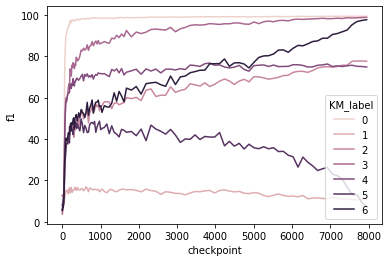

In [72]:
sns.lineplot(
    data=combined.copy()[
        (combined['n_clusters'] == 7) & 
        (combined['seed'] == 27) & 
        (combined['km_seed'] == 27)
    ].groupby(['checkpoint', 'KM_label']).mean().reset_index(), 
    x='checkpoint', 
    y='f1', 
    hue='KM_label'
)
plt.show()

In [73]:
subset = combined.copy()[
    (combined['n_clusters'] == 7) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 27)
][
    ['id', 'dataset', 'KM_label']
].drop_duplicates()  # Duplicated due to multiple checkpoints

print(subset.shape)
subset.head()

(13570, 3)


,id,dataset,KM_label
4885200,21a3561031f2e909338196601f5c1ac2e08905b6,dbert,2
4885320,b6a71a728a35506dd4cd2179c9342acf5e1a047a,dbert,4
4885440,6febf2fec8ae1b105a1b955897415fea4b2c0c28,dbert,4
4885560,53e4ce951aeab3a2712aa0966d73ec3e2c62ca11,dbert,4
4885680,a0a308febc5e9edf56fe63556cf20c039c3fdaca,dbert,1


In [74]:
subset[subset['KM_label'] == 3]['dataset'].value_counts() / subset[subset['KM_label'] == 3].shape[0]

squad       0.746154
dbidaf      0.098718
dbert       0.086325
droberta    0.068803
Name: dataset, dtype: float64

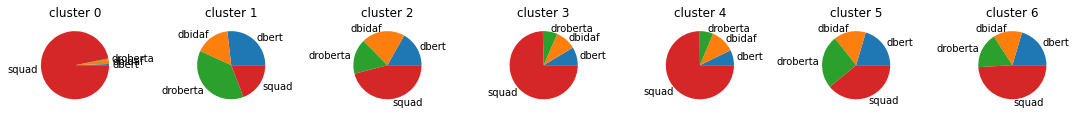

In [75]:
fig, axs = plt.subplots(1, subset['KM_label'].nunique(), figsize=(15, 4))

for i, label in enumerate(np.sort(subset['KM_label'].unique())):
    axs[i].pie(
        x=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['id'],
        labels=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['dataset']
    )
    axs[i].set_title(f'cluster {label}')
plt.tight_layout()
plt.show()

### 10 clusters, model seed 27, cluster seed 28

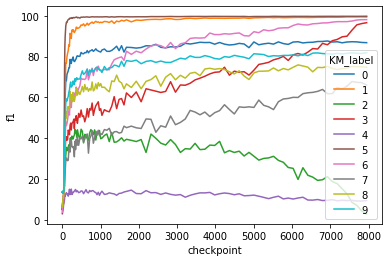

In [80]:
sns.lineplot(
    data=combined.copy()[
        (combined['n_clusters'] == 10) & 
        (combined['seed'] == 27) & 
        (combined['km_seed'] == 28)
    ].groupby(['checkpoint', 'KM_label']).mean().reset_index(), 
    x='checkpoint', 
    y='f1', 
    hue='KM_label',
    palette='tab10'
)
plt.show()

In [81]:
subset = combined.copy()[
    (combined['n_clusters'] == 10) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 28)
][
    ['id', 'dataset', 'KM_label']
].drop_duplicates()  # Duplicated due to multiple checkpoints

print(subset.shape)
subset.head()

(13570, 3)


,id,dataset,KM_label
24426000,21a3561031f2e909338196601f5c1ac2e08905b6,dbert,9
24426120,b6a71a728a35506dd4cd2179c9342acf5e1a047a,dbert,8
24426240,6febf2fec8ae1b105a1b955897415fea4b2c0c28,dbert,8
24426360,53e4ce951aeab3a2712aa0966d73ec3e2c62ca11,dbert,8
24426480,a0a308febc5e9edf56fe63556cf20c039c3fdaca,dbert,4


In [82]:
subset[subset['KM_label'] == 3]['dataset'].value_counts() / subset[subset['KM_label'] == 3].shape[0]

squad       0.484547
dbert       0.199779
droberta    0.177704
dbidaf      0.137969
Name: dataset, dtype: float64

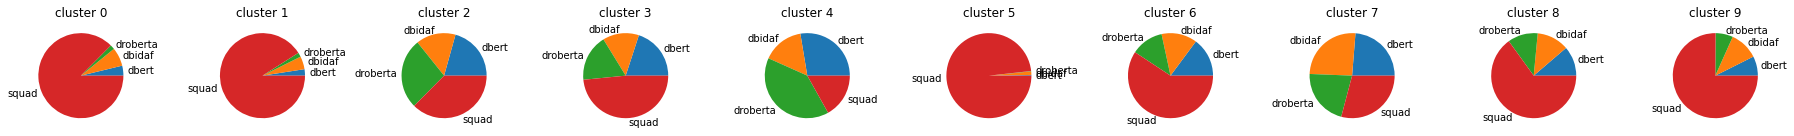

In [86]:
fig, axs = plt.subplots(1, subset['KM_label'].nunique(), figsize=(25, 5))

for i, label in enumerate(np.sort(subset['KM_label'].unique())):
    axs[i].pie(
        x=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['id'],
        labels=subset[subset['KM_label'] == label].groupby('dataset')['id'].count().reset_index()['dataset']
    )
    axs[i].set_title(f'cluster {label}')
plt.tight_layout()
plt.show()